In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.cm as cm

train = pd.read_csv("MNIST/train.csv")

In [2]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_size = 40000
test_size = 2000

train_data = train.values

# one hot encoding
one_hot = np.zeros([train_data.shape[0], 10])
one_hot[np.arange(train_data.shape[0]),train_data[:,0]] = 1

train_x = train_data[:train_size+1,1:]/255.0
train_y = one_hot[:train_size+1]
test_x = train_data[-test_size:,1:]/255.0
test_y = one_hot[-test_size:,:]

In [6]:
tf.reset_default_graph()

# 5 layer deep neural net
input_layer_nodes = 784
hidden_layer1_nodes = 512
hidden_layer2_nodes = 512
hidden_layer3_nodes = 256
output_layer_nodes = 10

X = tf.placeholder(tf.float32, [None, input_layer_nodes])
Y = tf.placeholder(tf.float32, [None, output_layer_nodes])

W1 = tf.Variable(tf.random_normal([input_layer_nodes, hidden_layer1_nodes]))
W2 = tf.Variable(tf.random_normal([hidden_layer1_nodes, hidden_layer2_nodes]))
W3 = tf.Variable(tf.random_normal([hidden_layer2_nodes, hidden_layer3_nodes]))
W4 = tf.Variable(tf.random_normal([hidden_layer3_nodes, output_layer_nodes]))

b1 = tf.Variable(tf.random_normal([hidden_layer1_nodes]))
b2 = tf.Variable(tf.random_normal([hidden_layer2_nodes]))
b3 = tf.Variable(tf.random_normal([hidden_layer3_nodes]))
b4 = tf.Variable(tf.random_normal([output_layer_nodes]))

_dropout_rate = tf.placeholder(tf.float32)

#out_hidden1 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(X, W1),b1)),_dropout_rate)
out_hidden1 = tf.nn.relu(tf.add(tf.matmul(X, W1),b1))
#out_hidden2 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(out_hidden1, W2),b2)),_dropout_rate)
out_hidden2 = tf.nn.relu(tf.add(tf.matmul(out_hidden1, W2),b2))
out_hidden3 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(out_hidden2, W3),b3)),_dropout_rate)
out_output = tf.add(tf.matmul(out_hidden3, W4),b4)
    
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=out_output))

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(out_output, 1), tf.arg_max(Y,1)), tf.float32))

_learning_rate = tf.placeholder(tf.float32)
train = tf.train.AdamOptimizer(_learning_rate).minimize(loss)

In [7]:
import time

loss_stack = [1]
acc_stack = []
test_acc_stack = []

sess = tf.Session()
sess.run(tf.global_variables_initializer())

def train_model(train_step, batch_size, learning_rate, log_step = 1):
    
    dropout_rate = 0.7
    
    for step in range(train_step):
        np.random.seed(int(time.time()))
        rand_idx = np.random.choice(train_size, size=batch_size)
        train_feed = {X:train_x[rand_idx,:], Y: train_y[rand_idx,:], _dropout_rate: dropout_rate, _learning_rate:learning_rate}

        sess.run(train, train_feed)

        train_acc_feed = {X:train_x, Y:train_y, _dropout_rate:1.0}
        test_acc_feed = {X:test_x, Y: test_y, _dropout_rate:1.0}

        loss_stack.append(sess.run(loss,train_acc_feed))
        acc_stack.append(sess.run(accuracy,train_acc_feed))
        test_acc_stack.append(sess.run(accuracy,test_acc_feed))

        if((step+1) % log_step == 0):
            print("step:{:3},\tloss:{:>6.2f},\tdloss:{:>3.1f}%,\ttrain_acc:{:1.4f},\ttest_acc:{:1.4f}".format(step+1, loss_stack[-1], (loss_stack[-2]-loss_stack[-1])/loss_stack[-2]*100 ,acc_stack[-1], test_acc_stack[-1]))
    

In [9]:
train_model(train_step=500, batch_size=100,learning_rate=0.001, log_step=20)

step: 20,	loss:558.32,	dloss:0.1%,	train_acc:0.8884,	test_acc:0.8785
step: 40,	loss:548.25,	dloss:0.1%,	train_acc:0.8890,	test_acc:0.8840
step: 60,	loss:530.98,	dloss:0.2%,	train_acc:0.8905,	test_acc:0.8875
step: 80,	loss:511.89,	dloss:0.2%,	train_acc:0.8920,	test_acc:0.8870
step:100,	loss:492.01,	dloss:0.1%,	train_acc:0.8935,	test_acc:0.8860
step:120,	loss:472.94,	dloss:0.1%,	train_acc:0.8946,	test_acc:0.8860
step:140,	loss:456.81,	dloss:0.3%,	train_acc:0.8938,	test_acc:0.8825
step:160,	loss:442.46,	dloss:0.2%,	train_acc:0.8947,	test_acc:0.8855
step:180,	loss:428.22,	dloss:0.3%,	train_acc:0.8959,	test_acc:0.8875
step:200,	loss:411.56,	dloss:0.1%,	train_acc:0.8979,	test_acc:0.8930
step:220,	loss:400.92,	dloss:0.1%,	train_acc:0.8985,	test_acc:0.8925
step:240,	loss:385.59,	dloss:0.2%,	train_acc:0.8997,	test_acc:0.8910
step:260,	loss:377.12,	dloss:0.2%,	train_acc:0.8987,	test_acc:0.8905
step:280,	loss:365.26,	dloss:0.1%,	train_acc:0.8992,	test_acc:0.8930
step:300,	loss:350.58,	dloss:0.0%,

In [10]:
saver = tf.train.Saver()
saver.save(sess, "./checkpoints/deepMNIST_drop7.ckpt")

'./checkpoints/deepMNIST_drop7.ckpt'

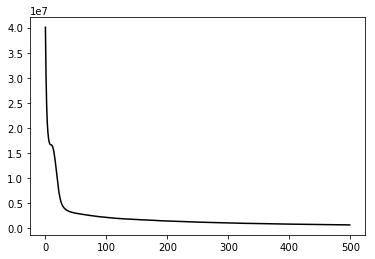

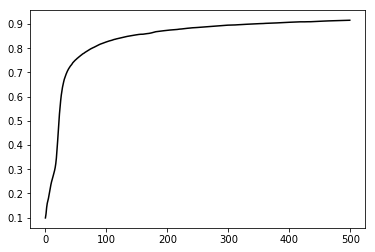

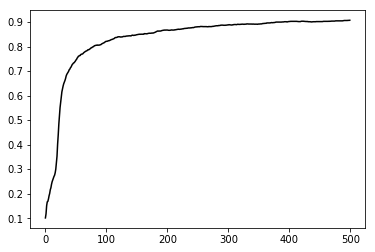

In [12]:
plot.plot(loss_stack, 'k-')
plot.show()
plot.plot(acc_stack, 'k-')
plot.show()
plot.plot(test_acc_stack, 'k-')
plot.show()

In [ ]:
test = pd.read_csv("MNIST/test.csv")

for i in range(3):
    plot.imshow((test.values[i,:]).reshape((28,28)),cmap=cm.binary)
    plot.show()
for i in range(3):
    plot.imshow((test.values[27997+i, :]).reshape((28,28)), cmap=cm.binary)
    plot.show()

In [ ]:

imgID = np.arange(1, 28001).reshape((-1,1))
prediction = np.argmax(sess.run(out_output,{X:test.values, dropout_rate:1.0}), 1).astype(int).reshape((-1,1))
print(prediction)
with open('final.csv', 'wb') as f:
  f.write(b'ImageId,Label\n')
  np.savetxt(f, np.concatenate((imgID, prediction),axis=1), fmt= '%i',delimiter=",")